[[ 0.6492783  -0.71728276]
 [ 1.72082859 -1.3287436 ]
 [ 1.5284087  -1.52940959]
 ...
 [ 0.11911167 -0.25955342]
 [ 0.17024514 -0.01168445]
 [ 1.23390289 -0.57575492]]
Class Distribution: Counter({np.int64(0): 9900, np.int64(1): 100})


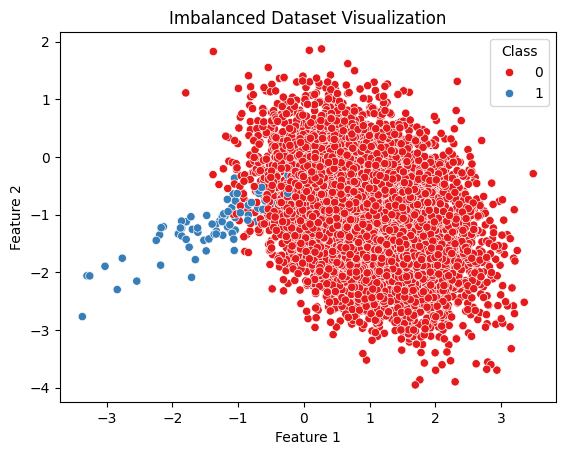

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters Found: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}

Accuracy Score: 0.9948

Confusion Matrix:
 [[2474    1]
 [  12   13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2475
           1       0.93      0.52      0.67        25

    accuracy                           0.99      2500
   macro avg       0.96      0.76      0.83      2500
weighted avg       0.99      0.99      0.99      2500



In [ ]:
# 📦 Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Explanation:

# numpy: For numerical operations (optional here).
# matplotlib.pyplot: To plot graphs.
# seaborn: A prettier plotting library (used for scatter plot).
# Counter: Used to count how many samples belong to each class.
# warnings.filterwarnings('ignore'): Hides warnings to keep output clean.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Explanation:

# make_classification: Creates fake classification datasets.
# LogisticRegression: The model we’re using.
# train_test_split: Splits the data into training and testing sets.
# GridSearchCV: Helps find the best hyperparameters.
# StratifiedKFold: Ensures each fold in CV has the same class ratio.
# accuracy_score, confusion_matrix, classification_report: Tools to evaluate model performance.

# 🧪 Step 2: Create Imbalanced Data
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           flip_y=0,
                           random_state=10)

# Explanation:

# n_samples=10000: 10,000 rows of data.
# n_features=2: Two features (input columns).
# n_informative=2: Both features give useful information.
# n_redundant=0: No useless (repeated) features.
# n_clusters_per_class=1: One cluster per class.
# weights=[0.99]: 99% of data belongs to class 0, 1% to class 1.
# flip_y=0: Don’t randomly flip labels (keeps data clean).
# random_state=10: Makes results repeatable.

print(X)
print("Class Distribution:", Counter(y))
# Output
# [[ 0.6492783  -0.71728276]
#  [ 1.72082859 -1.3287436 ]
#  [ 1.5284087  -1.52940959]
#  ...
#  [ 0.11911167 -0.25955342]
#  [ 0.17024514 -0.01168445]
#  [ 1.23390289 -0.57575492]]
# Class Distribution: Counter({np.int64(0): 9900, np.int64(1): 100})

# 📊 Step 3: Visualize the Data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1')
plt.title("Imbalanced Dataset Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class")
plt.show()

# Explanation:

# Plots feature 1 vs feature 2.
# Colors each point based on class (0 or 1).
# Helps visualize the imbalance.

#✂️ Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

# Explanation:

# test_size=0.25: 25% data goes to testing set.
# stratify=y: Keeps the class ratio same in both train and test sets.
# random_state=42: Ensures reproducible results.

# ⚖️ Step 5: Define Class Weights
weights = [
    {0: 1, 1: 1},
    {0: 1, 1: 10},
    {0: 1, 1: 50},
    {0: 1, 1: 100},
]

# Explanation:

# Trying different ways to give more importance to class 1.
# These dictionaries tell the model: "Class 1 is X times more important."

param_grid = {
    'penalty': ['l2'],
    'C': [1.0],
    'solver': ['lbfgs'],
    'class_weight': weights
}

# Explanation:

# penalty='l2': Regularization type (helps prevent overfitting).
# C=1.0: Regularization strength.
# solver='lbfgs': Optimization algorithm used by logistic regression.
# class_weight: Tries all weight dictionaries defined above.

# 🔍 Step 6: Run GridSearchCV
model = LogisticRegression()
cv = StratifiedKFold(n_splits=5)
# Explanation:
# Splits data into 5 parts, ensuring each fold has the same class ratio.

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv,
                           n_jobs=-1,
                           verbose=1)

# Explanation:

# estimator=model: The model we are tuning.
# param_grid: The dictionary of parameters to try.
# scoring='accuracy': Measure performance using accuracy.
# cv=cv: Use 5-fold stratified cross-validation.
# n_jobs=-1: Use all CPU cores for faster training.
# verbose=1: Print progress info.

grid_search.fit(X_train, y_train)

# ✅ Step 7: Evaluate the Best Model
print("Best Parameters Found:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Fitting 5 folds for each of 4 candidates, totalling 20 fits
# Best Parameters Found: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}

# Accuracy Score: 0.9948

# Confusion Matrix:
#  [[2474    1]
#  [  12   13]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      1.00      1.00      2475
#            1       0.93      0.52      0.67        25

#     accuracy                           0.99      2500
#    macro avg       0.96      0.76      0.83      2500
# weighted avg       0.99      0.99      0.99      2500


#why we giving class1 more importance ?
# 🎯 Imagine This Situation:
# You are building a model to detect fraud in online payments.

# You have 10,000 payments.
# Only 100 are fraud → class 1
# The other 9,900 are not fraud → class 0
# So the data looks like this:

# Class	Count
# 0 (not fraud)	9,900
# 1 (fraud)	100

# ❌ Problem Without Class Weight
# If the model always predicts "not fraud" (class 0), it will be 99% accurate – but it will miss all fraud cases.
# That's very bad, right?

# ✅ Solution: Give More Importance to Class 1
# We tell the model:
# "Hey! Class 1 (fraud) is very rare, but it's very important. Please focus more on it."

# We do this using:
# class_weight = {0: 1, 1: 50}
# This means:

# One mistake on class 1 is as bad as 50 mistakes on class 0.
# The model now takes class 1 seriously, and tries hard not to miss it.
# 🔁 What Happens Next?
# The model starts catching fraud cases (class 1).
# Accuracy might go down a little, but you’ll catch more important cases.




